# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataet

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df[['TV','radio','newspaper','sales']]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Checking null values in the dataframe

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

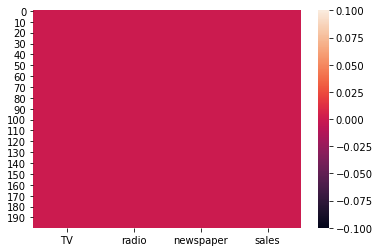

In [5]:
#data visualisation
sns.heatmap(df.isnull())

Observation: No null values are present in our dataset.

# Data Frame Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The study predicts the total sales generated from all the sales channel. 

Features:

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

Radio: advertising dollars spent on Radio

Newspaper: advertising dollars spent on Newspaper


Target:

Sales budget in thousands of dollars

In [6]:
df.shape

(200, 4)

Total Rows: 200
Total Columns: 4    

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the features have numerical data

In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# EDA:

#univariate analysis

<AxesSubplot:xlabel='TV', ylabel='Count'>

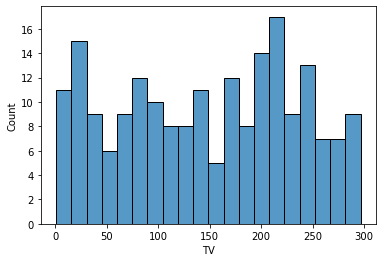

In [55]:
sns.histplot(data=df,x='TV',bins=20)

<AxesSubplot:xlabel='radio', ylabel='Count'>

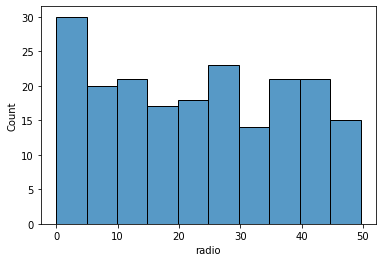

In [10]:
sns.histplot(data=df,x='radio',bins=10)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

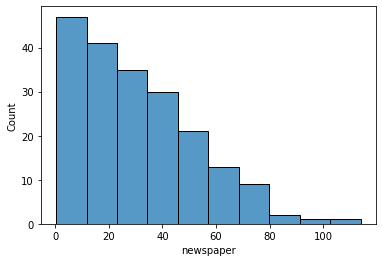

In [11]:
sns.histplot(data=df,x='newspaper',bins=10)

Observation:
1. The amount which is most frequently spent on TV advertisement is in the range of (200-230) dollars.
2. The amount which is most frequently spent on radio advertisement is in the range of (0-8)dollars.
3. The amount which is most frequently spent on newspaper advertisement is in the range of (0-10)dollars.

#bivariate analysis

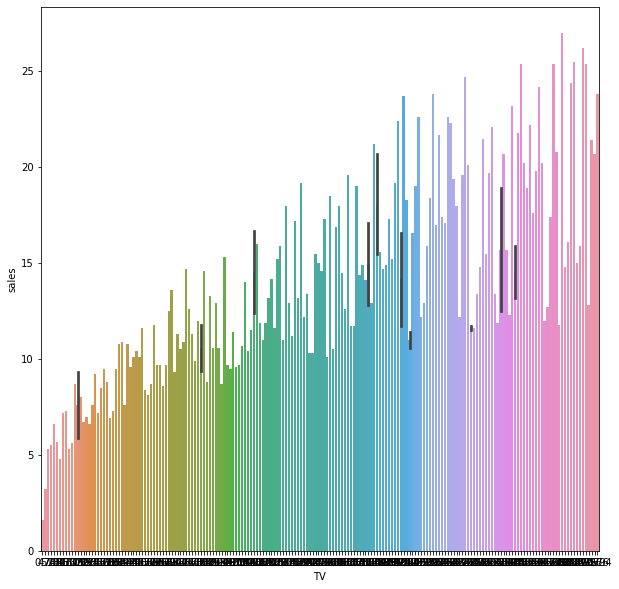

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='TV',y="sales")
plt.show()

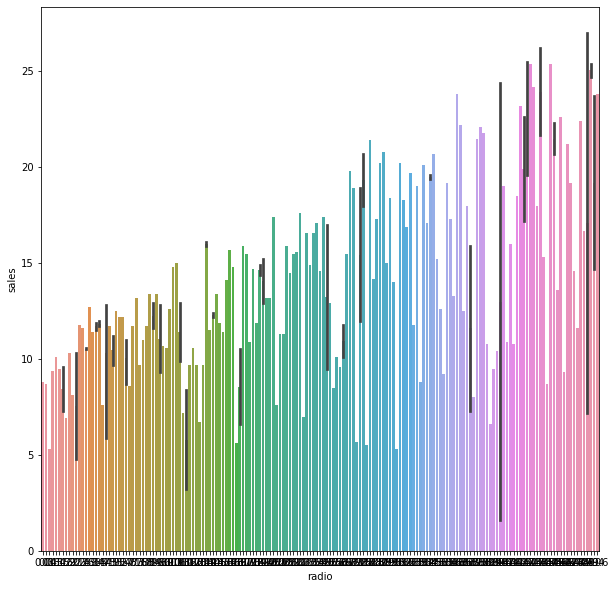

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='radio',y="sales")
plt.show()

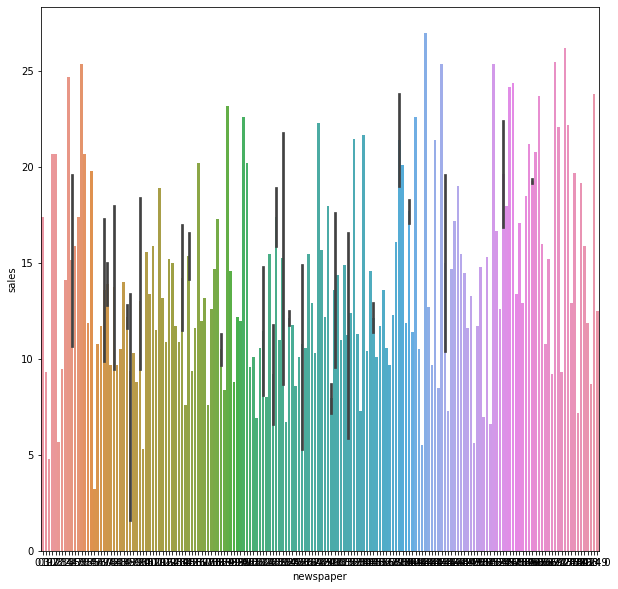

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='newspaper',y="sales")
plt.show()

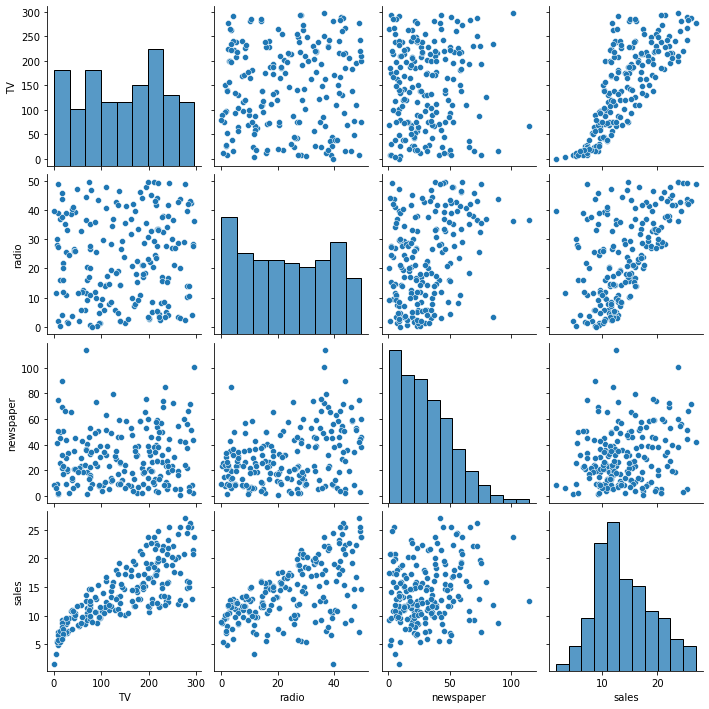

In [15]:
sns.pairplot(df)

Observation:
1.With increase in advertising dollar spent on TV,sales also increases.
2.With increase in advertising dollar spent on radio,sales also increases.
3.There is no clear image on sales with increase on dollar spent on newspaper

# Data Set Description

In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


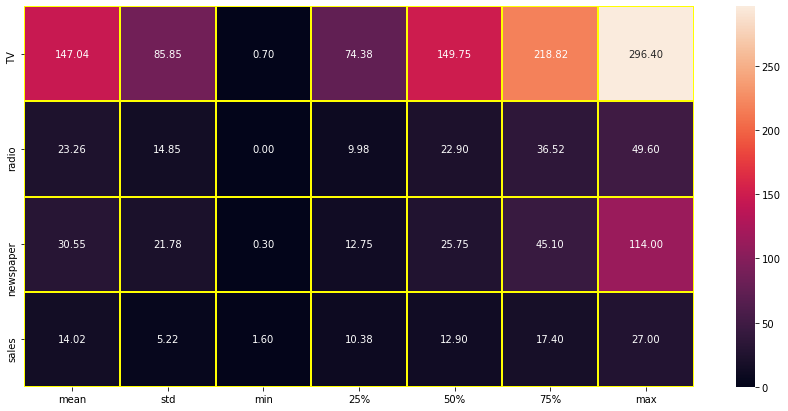

In [17]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:
1. The mean and median for TV,radio are almost equal indicating they might be normally distributed.
2. Newspaper seems to be right skewed since mean>median.
3. There is huge difference beteen min and 25% for TV indicating outliers might be present.
4. There is huge difference beteen 75% and max for newspaper indicating outliers might be present.

# Correlation of columns with target columns

In [18]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

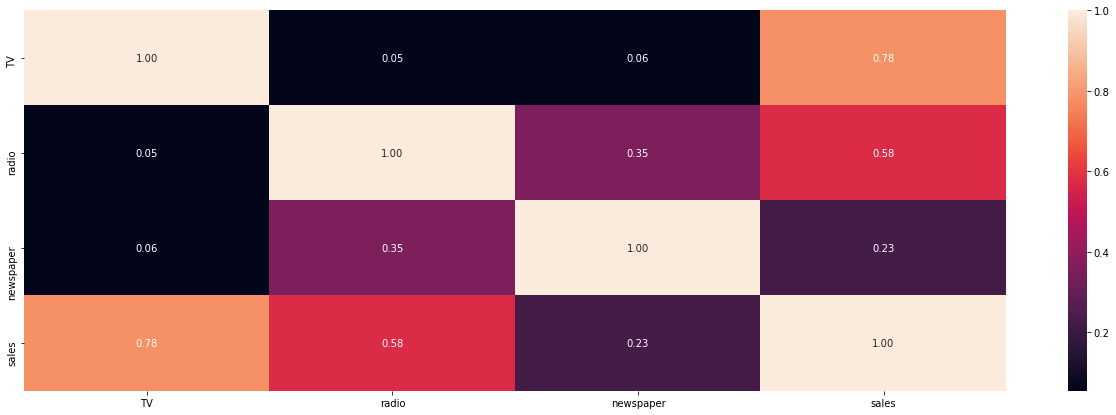

In [19]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
1. TV is 78% correlated with target.
2. Radio is 58% correlated with target.
3. Newspaper is 23% correlated with target.

# Checking Skewness:

In [20]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

keeping +/-0.5 as the range for the skewness, newspaper is the columns which doesnot lie within this range and need further treatment.

<AxesSubplot:xlabel='TV', ylabel='Density'>

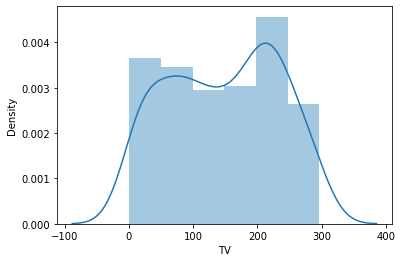

In [21]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

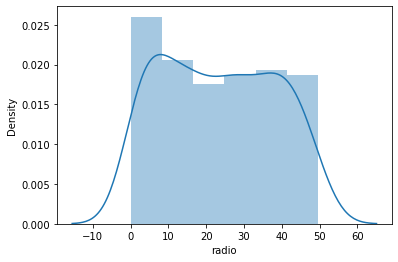

In [22]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

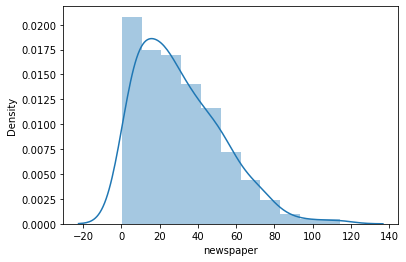

In [23]:
sns.distplot(df['newspaper'])

Observation:
TV and radio are normally distributed. Newspaper is right skewed.

# Outliers Checking:

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

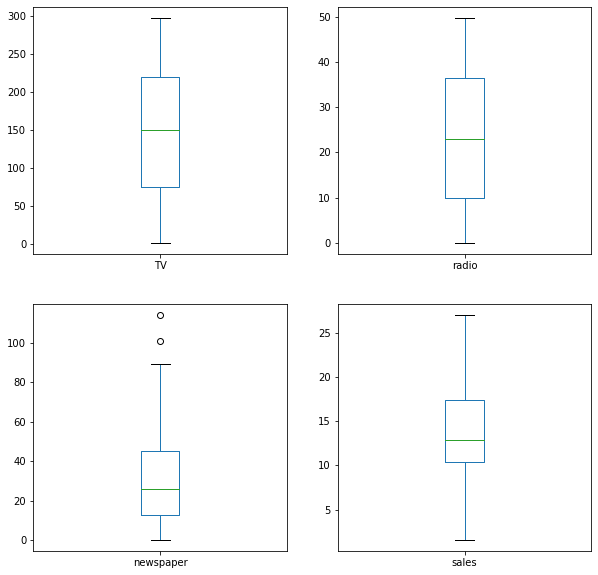

In [24]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,10))

Observation:
From the above outcome we can see very few oultiers present in newspaper but the datapoints are very close to the whiskers and cannot be trated as outlier.

# Data Preprocessing

# Transformation to remove skewness

In [25]:
df['newspaper']=np.sqrt(df['newspaper'])

In [26]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

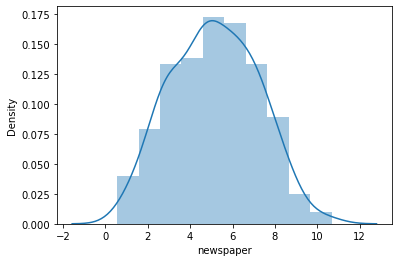

In [27]:
sns.distplot(df['newspaper'])

# Seperating the data into features and target

In [28]:
#independent column
x=df.iloc[:,:-1]

In [29]:
#target
y=df.iloc[:,-1]

In [30]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [31]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Since our outcome has continuous variable we will use regression model

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),3)==round(r2_score(y_test,test_pred),3):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.894969443184809
testing score : 0.8951632785467964
At random_state= 89 the model performs well 



In [33]:
#selecting random_state =89
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=89)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.8951632785467964
training score : 0.894969443184809
Error:
Mean absolue error: 1.3652608700983941
Mean squared error: 3.025462850713058
Root Mean squared error: 1.7393857682276976


# Cross Validation Of the Model:

In [34]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',r2_score(y_train,train_pred))
    print('testing score :',r2_score(y_test,test_pred))
    print('\n')

At crossfold= 2 the cv score is 0.8916349860383767
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 3 the cv score is 0.8915588165323286
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 4 the cv score is 0.8903579284297553
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 5 the cv score is 0.8873331295445761
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 6 the cv score is 0.8900202280811486
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 7 the cv score is 0.8861692012354758
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 8 the cv score is 0.8826536626159895
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 9 the cv score is 0.882418124174371
training score : 0.894969443184809
testing score : 0.8951632785467964


At crossfold= 10 

Since the number of folds dont have such impact on the accuracy score and cv_score.So cv=4 is selected.
HERE WE HAVE HANDLED THE PROBLEM OF OVERFITTING AND UNDERFITTING BY CHECKING TRAINING AND TESTING SCORE

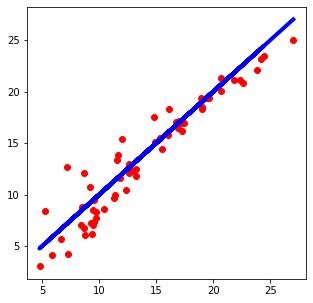

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,test_pred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

Observation:
    Some predicted values are away from the best fit line.

# Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
dtr.score(x_train,y_train)
cv_score=cross_val_score(dtr,x,y,cv=4)
cv_mean=cv_score.mean()
print('testing score :',r2_score(y_test,dtrpred))
print('training score :',dtr.score(x_train,y_train))
print('The CV score is:',cv_mean)
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,dtrpred))
print('Mean squared error:',mean_squared_error(y_test,dtrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,dtrpred)))

testing score : 0.9397584273085889
training score : 1.0
The CV score is: 0.9399591069685787
Error:
Mean absolue error: 1.0183333333333335
Mean squared error: 1.7384999999999995
Root Mean squared error: 1.318521899704362


# Support Vector Regressor

In [37]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
svr=SVR()                         
svr.fit(x_train,y_train)
svrpred=svr.predict(x_test)
svr.score(x_train,y_train) 
cv_score=cross_val_score(svr,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,svrpred))
print('training score :',svr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,svrpred))
print('Mean squared error:',mean_squared_error(y_test,svrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,svrpred)))

The CV score is: 0.8228691459691664
testing score : 0.8438619967691756
training score : 0.8022309736069783
Error:
Mean absolue error: 1.5311464643063717
Mean squared error: 4.5059567087877435
Root Mean squared error: 2.1227238889661892


# KNeighborsRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.9495934573491601
testing score : 0.9666625181162193
training score : 0.9672261448134466
Error:
Mean absolue error: 0.7626666666666667
Mean squared error: 0.9620800000000004
Root Mean squared error: 0.9808567683408217


# Ensemble Methods
Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.9773711163967751
testing score : 0.9771577227865438
training score : 0.9967723808383511
Error:
Mean absolue error: 0.6464333333333331
Mean squared error: 0.6592008999999993
Root Mean squared error: 0.811911879454907


Adaboost Regressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=300)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.9617358606000493
testing score : 0.9592401005484172
training score : 0.9772996136937625
Error:
Mean absolue error: 0.8810018848928866
Mean squared error: 1.1762821259591656
Root Mean squared error: 1.0845654087970746


# TUNING THE MODEL USING GRID SEARCH CV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# random forest
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [43]:
rf=RandomForestRegressor(n_estimators=350,max_features='auto',max_depth=10)     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.9782610970601726
testing score : 0.9753156709226083
training score : 0.9968341958170213
Error:
Mean absolue error: 0.6759065702947856
Mean squared error: 0.712360321681375
Root Mean squared error: 0.8440144084560257


In [44]:
#adaboost
parameters={'n_estimators':[100,200,300,350],'learning_rate':[0.001,0.01,0.1,1,10]}
ad=AdaBoostRegressor()
adg=GridSearchCV(ad,parameters)
adg.fit(x_train,y_train)
print(adg.best_params_)

{'learning_rate': 1, 'n_estimators': 200}


In [45]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=350,learning_rate=1)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.962657042103575
testing score : 0.9566181551193809
training score : 0.9756205404927452
Error:
Mean absolue error: 0.8963768042661167
Mean squared error: 1.2519483465561865
Root Mean squared error: 1.118904976553499


In [46]:
#kneighbors 
parameters={'n_neighbors':[5,10,15,20,25,30,35]}
knr=KNeighborsRegressor()
knrg=GridSearchCV(knr,parameters)
knrg.fit(x_train,y_train)
print(knrg.best_params_)

{'n_neighbors': 5}


In [47]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=4)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.9495934573491601
testing score : 0.9666625181162193
training score : 0.9672261448134466
Error:
Mean absolue error: 0.7626666666666667
Mean squared error: 0.9620800000000004
Root Mean squared error: 0.9808567683408217


# CONCLUSION:

Comparing the performance metrics we selecting Random Forest as our final model as it is very perforing extremely well in comparison to oher model.

In [48]:
original=np.array(y_test)
predicted=np.array(rfpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted})
df_com

,Original,Predicted
0,7.3,7.366286
1,12.8,12.734679
2,8.8,10.149143
3,19.0,18.420119
4,12.0,12.276810
5,16.9,17.375548
6,9.3,10.200095
7,8.4,9.532000
8,20.7,19.846064
9,9.7,10.434548


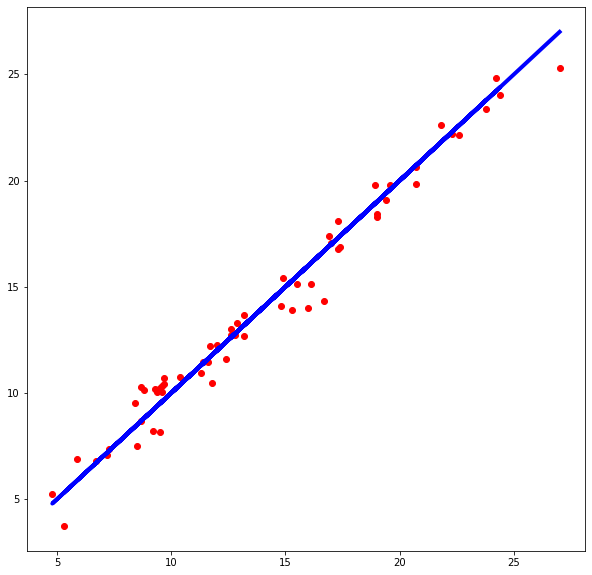

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,rfpred,color='r')
plt.plot(y_test,y_test,color='b',linewidth='4')
plt.show()

Observation:
    Maximun predicted values are very close to the best fit line.

# SAVING BEST MODEL

In [50]:
import joblib

In [51]:
joblib.dump(rf,'rffile.obj')

['rffile.obj']